In [2]:
import pandas as pd

In [3]:
oil = pd.read_csv("../retail/oil.csv", parse_dates=['date'])
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [4]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


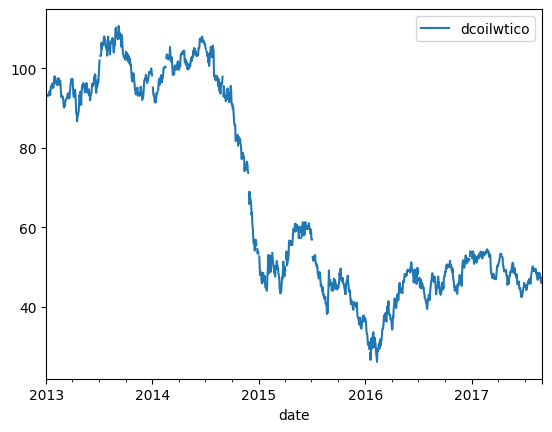

In [5]:
# plotting with 'x=column_for_x_axis' which plots all data
oil.plot(x='date');

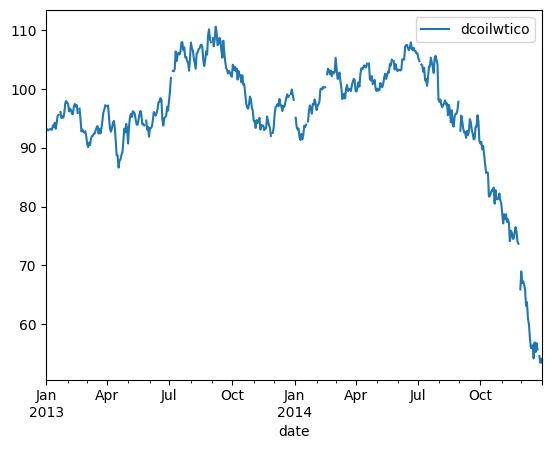

In [6]:
# plotting with set_index('column_for_x_axis)
oil.set_index('date').loc['2013':'2014'].plot();
# There  was a growing supply that was no capitalized upon and drove the prices down significantly

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [7]:
# change date columns to datetime64
oil['date'] = oil['date'].astype('datetime64[ns]')
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

In [8]:
# rename dcoilwtico column to oil price using dictionary
oil = oil.rename(columns={'dcoilwtico':'Oil Price'})
oil.dtypes


date         datetime64[ns]
Oil Price           float64
dtype: object

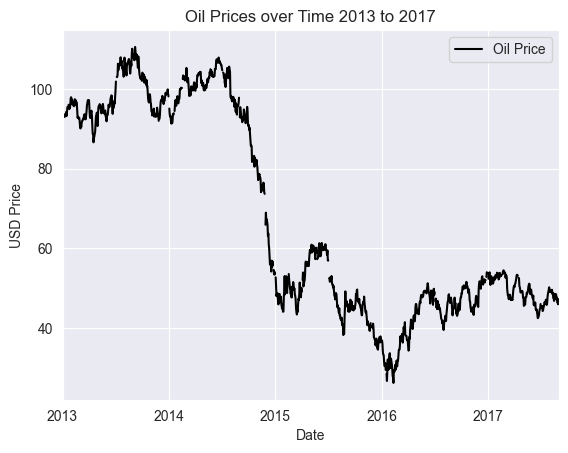

In [9]:
import seaborn as sns

# apply 'darkgrid' style to charts
sns.set_style('darkgrid')
# provide style, axis titles, and black line color to chart
oil.set_index('date').plot(
    xlabel='Date', 
    ylabel='USD Price',
    color='Black',
    title='Oil Prices over Time 2013 to 2017'
    );

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [10]:
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [11]:
# filter store_nbr for Stores 1 to 4 using logical conditions
mask1234 = (
    (transactions['store_nbr'] >= 1) &
    (transactions['store_nbr'] < 5)
)
##### OR ######

# filter store_nbr for Stores 1 to 4 using pd['column_name].isin([]) method
mask_1234 = transactions['store_nbr'].isin([1,2,3,4])

# apply mask to transactions DataFrame
stores_1234 = transactions.loc[mask_1234]
stores_1234

,date,store_nbr,transactions
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
47,2013-01-03,1,1833
...,...,...,...
83383,2017-08-14,4,1285
83434,2017-08-15,1,1693
83435,2017-08-15,2,1737
83436,2017-08-15,3,2956


In [12]:
# Create a pivot table of stores 1 to 4 with daily transactions
stores_1234 = stores_1234.pivot_table(
    index='date',
    columns='store_nbr'
).droplevel(0, axis=1)
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


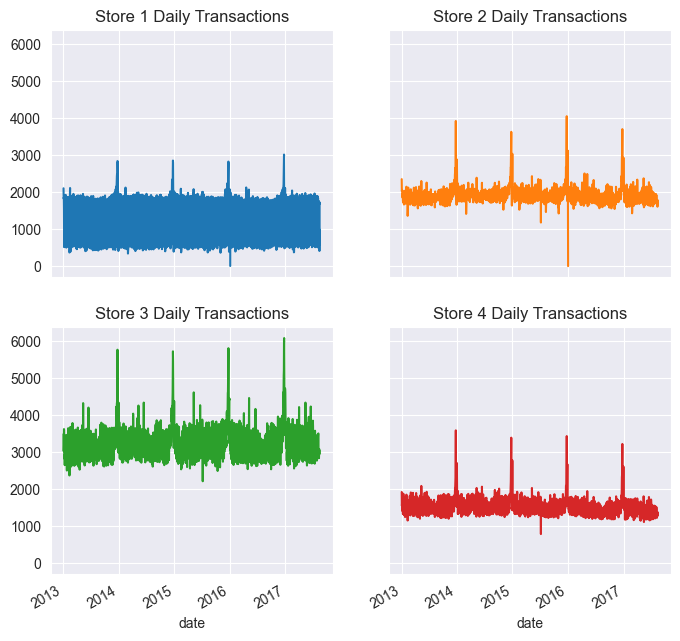

In [13]:
# create subplots(2 by 2), of transactions vs. Date
stores_1234.plot(
    subplots=True,
    sharey=True,
    layout=(2,2),
    figsize=(8,8),
    legend=False,
    title=['Store 1 Daily Transactions', 'Store 2 Daily Transactions', 'Store 3 Daily Transactions','Store 4 Daily Transactions']
    );

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

<Axes: xlabel='store_nbr'>

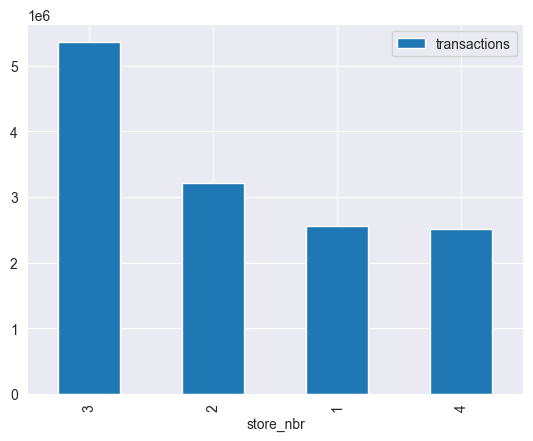

In [29]:
stores_1234 = transactions.pivot_table(
    index='store_nbr',
    aggfunc=({'transactions':'sum'})
)
stores_1234.iloc[:4,:].sort_values(by='transactions', ascending=False).plot.bar()

In [15]:
# convert dates to datetime64
stores_1234.index = stores_1234.index.astype("datetime64[ns]")

stores_1234.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1682, freq=None)

In [16]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.
# Create a pivot table of stores 1 to 4 with daily transactions

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [17]:
stores_1234.head()

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,2111.0,2358.0,3487.0,1922.0,1903.0,2143.0,1874.0,3250.0,2940.0,1293.0,...,4208.0,4886.0,4161.0,3397.0,2346.0,3077.0,1985.0,NaN,NaN,998.0
2013-01-03,1833.0,2033.0,3026.0,1551.0,1740.0,1795.0,1568.0,2904.0,2396.0,1157.0,...,3314.0,3438.0,3660.0,2887.0,1702.0,2307.0,1644.0,NaN,NaN,920.0
2013-01-04,1863.0,2066.0,3188.0,1596.0,1642.0,1679.0,1513.0,2962.0,1975.0,970.0,...,3630.0,3434.0,3915.0,2900.0,2016.0,2698.0,1786.0,NaN,NaN,794.0
2013-01-05,1509.0,2062.0,3623.0,1825.0,1643.0,2154.0,1599.0,3060.0,2604.0,1269.0,...,4331.0,4935.0,4764.0,4084.0,2562.0,3459.0,2068.0,NaN,NaN,949.0


# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [18]:
stores_1234.head()

store_nbr,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,2111.0,2358.0,3487.0,1922.0,1903.0,2143.0,1874.0,3250.0,2940.0,1293.0,...,4208.0,4886.0,4161.0,3397.0,2346.0,3077.0,1985.0,NaN,NaN,998.0
2013-01-03,1833.0,2033.0,3026.0,1551.0,1740.0,1795.0,1568.0,2904.0,2396.0,1157.0,...,3314.0,3438.0,3660.0,2887.0,1702.0,2307.0,1644.0,NaN,NaN,920.0
2013-01-04,1863.0,2066.0,3188.0,1596.0,1642.0,1679.0,1513.0,2962.0,1975.0,970.0,...,3630.0,3434.0,3915.0,2900.0,2016.0,2698.0,1786.0,NaN,NaN,794.0
2013-01-05,1509.0,2062.0,3623.0,1825.0,1643.0,2154.0,1599.0,3060.0,2604.0,1269.0,...,4331.0,4935.0,4764.0,4084.0,2562.0,3459.0,2068.0,NaN,NaN,949.0
